In [1]:
import sklearn
print(sklearn.__version__)


1.5.1


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('house_data.csv')

In [9]:
print(data.head())

   Area  Bedrooms  Location  Age   Price
0  3674         1     Urban   11  829903
1  1360         2     Rural   28  145714
2  1794         4     Rural   25  727234
3  1630         1     Rural   25  996048
4  1595         4  Suburban   18  730271


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Area      100 non-null    int64 
 1   Bedrooms  100 non-null    int64 
 2   Location  100 non-null    object
 3   Age       100 non-null    int64 
 4   Price     100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.0+ KB
None


In [13]:
print(data.describe())

              Area    Bedrooms         Age          Price
count   100.000000  100.000000  100.000000     100.000000
mean   2368.700000    2.470000   14.870000  514375.040000
std    1018.723617    1.158674    8.983323  263812.114104
min     521.000000    1.000000    1.000000  104014.000000
25%    1566.750000    1.000000    6.000000  277727.750000
50%    2468.000000    3.000000   16.000000  509273.000000
75%    3288.750000    3.000000   22.250000  749469.750000
max    3999.000000    4.000000   29.000000  997059.000000


In [21]:
data = data.dropna()
data

,Area,Bedrooms,Age,Price,Location_Suburban,Location_Urban
0,3674,1,11,829903,False,True
1,1360,2,28,145714,False,False
2,1794,4,25,727234,False,False
3,1630,1,25,996048,False,False
4,1595,4,18,730271,True,False
...,...,...,...,...,...,...
95,2817,3,15,327897,False,True
96,1315,1,1,131024,False,True
97,3842,3,5,170313,False,False
98,955,3,28,489957,True,False


In [23]:
data = pd.get_dummies(data, drop_first=True)
data


,Area,Bedrooms,Age,Price,Location_Suburban,Location_Urban
0,3674,1,11,829903,False,True
1,1360,2,28,145714,False,False
2,1794,4,25,727234,False,False
3,1630,1,25,996048,False,False
4,1595,4,18,730271,True,False
...,...,...,...,...,...,...
95,2817,3,15,327897,False,True
96,1315,1,1,131024,False,True
97,3842,3,5,170313,False,False
98,955,3,28,489957,True,False


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Area               100 non-null    int64
 1   Bedrooms           100 non-null    int64
 2   Age                100 non-null    int64
 3   Price              100 non-null    int64
 4   Location_Suburban  100 non-null    bool 
 5   Location_Urban     100 non-null    bool 
dtypes: bool(2), int64(4)
memory usage: 3.4 KB


In [31]:
X = data.drop('Price', axis=1)   # 'Price' is the target column
y = data['Price']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [38]:
y_pred = model.predict(X_test)

In [40]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 77748842939.86
R² Score: -0.07


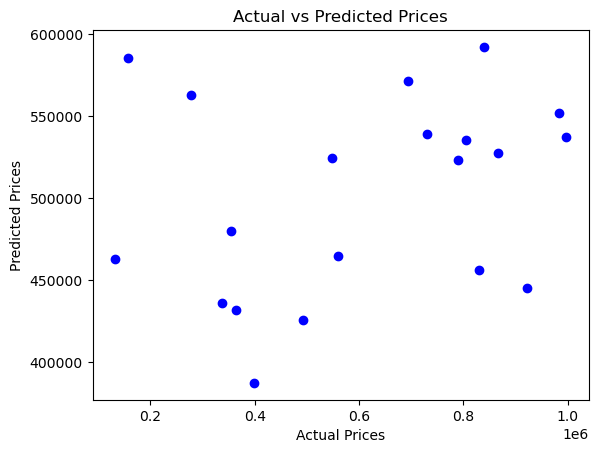

In [42]:
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()